### Подключение библиотек

In [307]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from geopy.geocoders import Nominatim

from imblearn.over_sampling import ADASYN

### Описание признаков

- **Field name** - название месторождения
- **Reservoir unit** - юнит месторождения
- **Country** - страна расположения
- **Region** - регион расположения
- **Basin name** - название бассейна пород
- **Tectonic regime** - тектонический режим
- **Latitude** - широта
- **Longitude** - долгота
- **Operator company** - название компании
- **Onshore or oﬀshore** - на суше или нет
- **Hydrocarbon type (main)** - тип углеводорода
- **Reservoir status (current)** - статус месторождения
- **Structural setting** - структурные свойства
- **Depth (top reservoir ft TVD)** - глубина
- **Reservoir period** - литологический период
- **Lithology (main)** - литология
- **Thickness (gross average ft)** - общая толщина
- **Thickness (net pay average ft)** - эффективная толщина
- **Porosity (matrix average 20. Permeability (air average mD)** – проницаемость

### Считывание файлов

In [7]:
train = pd.read_csv("train_oil.csv")
test = pd.read_csv("oil_test.csv")

## Знакомство с данными

### Информация о столбцах

In [8]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    object 
 1   Reservoir unit                  309 non-null    object 
 2   Country                         282 non-null    object 
 3   Region                          271 non-null    object 
 4   Basin name                      271 non-null    object 
 5   Tectonic regime                 309 non-null    object 
 6   Latitude                        282 non-null    float64
 7   Longitude                       279 non-null    float64
 8   Operator company                309 non-null    object 
 9   Onshore/Offshore                309 non-null    object 
 10  Hydrocarbon type                309 non-null    object 
 11  Reservoir status                309 non-null    object 
 12  Structural setting              309 

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [9]:
# Строковые признаки
train.loc[:, train.dtypes == object].columns

Index(['Field name', 'Reservoir unit', 'Country', 'Region', 'Basin name',
       'Tectonic regime', 'Operator company', 'Onshore/Offshore',
       'Hydrocarbon type', 'Reservoir status', 'Structural setting',
       'Reservoir period', 'Lithology'],
      dtype='object')

In [10]:
for colum in train.loc[:, train.dtypes == object].columns:
    print(train[colum].value_counts())
    print("-" * 30)

Field name
ERSKINE              3
ZAKUM                3
LAOJUNMIAO           3
LLOYDMINSTER AREA    2
ELK BASIN            2
                    ..
WENMINGZHAI          1
BADR EL DIN-3        1
ANASAZI              1
BINDLEY              1
WELL DRAW            1
Name: count, Length: 285, dtype: int64
------------------------------
Reservoir unit
BRENT                        8
SAN ANDRES                   7
SHUAIBA                      5
TOR-EKOFISK                  4
LEMAN SANDSTONE              4
                            ..
WATT MOUNTAIN (GILWOOD A)    1
LOWER GANCHAIGOU             1
ZELTEN                       1
BATURAJA                     1
MESAVERDE (TEAPOT SAND)      1
Name: count, Length: 258, dtype: int64
------------------------------
Country
USA                    80
CANADA                 33
UK                     22
CHINA                  20
RUSSIA                 18
NORWAY                 11
INDONESIA              10
AUSTRALIA               8
EGYPT                   

### Поиск дубликатов

In [11]:
# Нахождение полностью одинаковых строк
duplicates = train[train.duplicated(keep="first") & ~train.duplicated()]
print(duplicates)

duplicates = test[test.duplicated(keep="first") & ~test.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Field name, Reservoir unit, Country, Region, Basin name, Tectonic regime, Latitude, Longitude, Operator company, Onshore/Offshore, Hydrocarbon type, Reservoir status, Structural setting, Depth, Reservoir period, Lithology, Thickness (gross average ft), Thickness (net pay average ft), Porosity, Permeability]
Index: []
Empty DataFrame
Columns: [Field name, Reservoir unit, Country, Region, Basin name, Tectonic regime, Latitude, Longitude, Operator company, Hydrocarbon type, Reservoir status, Structural setting, Depth, Reservoir period, Lithology, Thickness (gross average ft), Thickness (net pay average ft), Porosity, Permeability]
Index: []


### Поиск пустых значений

In [12]:
print("Number of missing values in train dataset:")
print(f"train - {train.shape}, null - {train.isna().sum().sum()}")
print(train.isna().sum())
print("Number of missing values in test dataset:")
print(f"test - {test.shape}, null - {test.isna().sum().sum()}")
print(test.isna().sum())

Number of missing values in train dataset:
train - (309, 20), null - 160
Field name                         0
Reservoir unit                     0
Country                           27
Region                            38
Basin name                        38
Tectonic regime                    0
Latitude                          27
Longitude                         30
Operator company                   0
Onshore/Offshore                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64
Number of missing values in test dataset:
test - (133, 19), null - 66
Field name                         0
Reservoir unit                     0
Country                       

## Предобработка данных

### Устранение пустых значений

In [28]:
# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

In [14]:
dataframes = {"train": train, "test": test}

for key, df in dataframes.items():
    missing_coordinates = df[df["Latitude"].isnull() | df["Longitude"].isnull()][
        ["Field name", "Country", "Latitude", "Longitude"]
    ]
    if not missing_coordinates.empty:
        print(f"Missing coordinates in DataFrame '{key}':")
        print(missing_coordinates)
    else:
        print(f"No missing coordinates in DataFrame '{key}'.")

Missing coordinates in DataFrame 'train':
            Field name  Country  Latitude  Longitude
11       BADR EL DIN-2      NaN       NaN        NaN
12        BRIDGER LAKE      NaN       NaN        NaN
15               SCOTT      NaN       NaN        NaN
28               ZAKUM      NaN       NaN        NaN
33            GASIKULE      NaN       NaN        NaN
35                UZEN      NaN       NaN        NaN
37                 ULA      NaN       NaN        NaN
49               YIBAL      NaN       NaN        NaN
50         PALM VALLEY      NaN       NaN        NaN
55             WUBAITI      NaN       NaN        NaN
79             OROCUAL      NaN       NaN        NaN
80            GLENBURN      NaN       NaN        NaN
89    HARMATTAN-ELKTON      NaN       NaN        NaN
92           TIA JUANA      NaN       NaN        NaN
98          EMPIRE ABO      NaN       NaN        NaN
100    NORTH ROBERTSON      NaN       NaN        NaN
102        TABER NORTH      NaN       NaN        NaN
130 

In [15]:
train[train["Latitude"].isnull() | train["Longitude"].isnull()]["Field name"].unique()

array(['BADR EL DIN-2', 'BRIDGER LAKE', 'SCOTT', 'ZAKUM', 'GASIKULE',
       'UZEN', 'ULA', 'YIBAL', 'PALM VALLEY', 'WUBAITI', 'OROCUAL',
       'GLENBURN', 'HARMATTAN-ELKTON', 'TIA JUANA', 'EMPIRE ABO',
       'NORTH ROBERTSON', 'TABER NORTH', 'RHOURDE EL BAGUEL', 'CAROLINE',
       'WEST SEMINOLE', 'ALPINE', 'BEAVER LODGE', 'TALCO', 'QARUN',
       'ANDREW', 'ROURKE GAP', 'CASHIRIARI', 'ORENBURG', 'BARQUE',
       'YAKIN'], dtype=object)

In [ ]:
# for key, df in dataframes.items():
#     print(f"\n Координаты в DataFrame '{key}':\n")
#     places = df[df["Latitude"].isnull() | df["Longitude"].isnull()][
#         "Field name"
#     ].unique()
    
#     for place in places:
#         location = geolocator.geocode(place)
#         if location:
#             print(f"Место: {place}")
#             print(f"{location.latitude}, {location.longitude}")
#         else:
#             print(f"Для места {place} не удалось найти координаты.")

In [17]:
locations = {
    "ARUN": "ARUN",
    "KG": "KG",
    "KHALDA": "KHALDA",
    "WEIYUAN": "WEIYUAN",
    "ZAKUM": "ZAKUM",
    "UZEN": "UZEN",
    "SCOTT": "SCOTT",
    "BRIDGER LAKE": "BRIDGER LAKE",
    "YAKIN": "YAKIN",
    "BARQUE": "BARQUE",
    "ORENBURG": "ORENBURG",
    "CASHIRIARI": "CASHIRIARI",
    "BEAVER LODGE": "BEAVER LODGE",
    "ALPINE": "ALPINE",
    "NORTH ROBERTSON": "NORTH ROBERTSON",
    "TABER NORTH": "TABER NORTH",
    "GASIKULE": "GASIKULE",
    "TIA JUANA": "TIA JUANA",
    "GLENBURN": "GLENBURN",
    "OROCUAL": "OROCUAL",
    "PALM VALLEY": "PALM VALLEY",
    "YIBAL": "YIBAL",
    "ULA": "ULA",
    "WEST SEMINOLE": "WEST SEMINOLE",
    "BADR EL DIN-2": "BADR EL DIN-2",
    "JULY": "JULY",
    "CAROLINE": "CAROLINE",
    "EMPIRE ABO": "EMPIRE ABO",
    "BALOL": "BALOL",
    "GORGON": "GORGON",
    "LIUHUA 11-1": "LIUHUA 11-1",
    "OCTOBER": "OCTOBER",
    "RAMA": "RAMA",
    "ANDREW": "ANDREW SANDSTONE",
    "QARUN": "QARUN",
    "TALCO": "TALCO",
    "DJEITUN": "TURKMENISTAN",  # 39.5800,
    "CHALYBEAT SPRINGS": "USA",  # 33.0456,
    "MAYDAN MAHZAM": "QATAR", # 25.5, 52.75
    "VERMEJO-MOORE HOOPER": "FUSSELMAN",
    "PRIRAZLOM": "TIMAN-PECHORA",
    "ROURKE GAP": "USA",  #  37.2423406, 81.1073129
    "RHOURDE EL BAGUEL": "ALGERIA",  # 31.39,
    "HARMATTAN-ELKTON": "TURNER VALLEY",
    "WUBAITI": "HUANGLONG",  # 30.0840, 107.3250
    "BELAYIM MARINE": "GULF OF SUEZ",  # 28.6160, 33.2020
}

In [36]:
for key, df in dataframes.items():
    for field_name, location in locations.items():
            location = geolocator.geocode(location)
            df.loc[df["Field name"] == field_name, "Longitude"] = location.longitude
            df.loc[df["Field name"] == field_name, "Latitude"] = location.latitude

In [37]:
for key, df in dataframes.items():
    missing_coordinates = df[df["Latitude"].isnull() | df["Longitude"].isnull()][
        ["Field name", "Country", "Latitude", "Longitude"]
    ]
    if not missing_coordinates.empty:
        print(f"Missing coordinates in DataFrame '{key}':")
        print(missing_coordinates)
    else:
        print(f"No missing coordinates in DataFrame '{key}'.")

No missing coordinates in DataFrame 'train'.
No missing coordinates in DataFrame 'test'.


In [38]:
train["Latitude"] = [i + 360 if i < 0 else i for i in train["Latitude"]]
test["Latitude"] = [i + 360 if i < 0 else i for i in test["Latitude"]]
train["Longitude"] = [i + 360 if i < 0 else i for i in train["Longitude"]]
test["Longitude"] = [i + 360 if i < 0 else i for i in test["Longitude"]]

In [39]:
print(test.isna().sum())

Field name                         0
Reservoir unit                     0
Country                           13
Region                            16
Basin name                         8
Tectonic regime                    0
Latitude                           0
Longitude                          0
Operator company                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64


### Удаление бесполезных признаков

In [76]:
train = train.drop(
    columns=[
        "Field name",
        "Region",
        "Country",
        "Operator company",
        "Reservoir status",
        "Reservoir unit",
        "Basin name",
    ]
)
test = test.drop(
    columns=[
        "Field name",
        "Region",
        "Country",
        "Operator company",
        "Reservoir status",
        "Reservoir unit",
        "Basin name",
    ]
)

### Сохранение промежуточных результатов

In [77]:
# test.to_csv("test.csv")
# train.to_csv("train.csv")

### Обработка строковых признаков

In [281]:
# Чтение промежуточных результатов
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.drop(train.columns[[0, 1]], axis=1, inplace=True)
test.drop(test.columns[[0, 1]], axis=1, inplace=True)

In [282]:
for colum in test.loc[:, test.dtypes == object].columns:
    print(test[colum].value_counts())
    print("-" * 30)

Tectonic regime
COMPRESSION                                                                     24
EXTENSION                                                                       16
COMPRESSION/EVAPORITE                                                           13
INVERSION/COMPRESSION/EXTENSION                                                 12
COMPRESSION/EROSION                                                             11
GRAVITY/EXTENSION/EVAPORITE/SYNSEDIMENTATION                                     6
STRIKE-SLIP/TRANSPRESSION/BASEMENT-I                                             5
EXTENSION/EROSION                                                                4
INVERSION/COMPRESSION/EXTENSION/EVAPORITE                                        4
GRAVITY/EVAPORITE/COMPRESSION                                                    3
COMPRESSION/STRIKE-SLIP/TRANSPRESSION/BASEMENT-I                                 3
INVERSION/COMPRESSION/EXTENSION/EROSION                                

In [283]:
period_age_dict = {
    "CRETACEOUS": 145,
    "JURASSIC": 201,
    "NEOGENE": 2.6,
    "PALEOGENE": 66,
    "CARBONIFEROUS": 358,
    "PERMIAN": 298,
    "DEVONIAN": 419,
    "TRIASSIC": 252,
    "CRETACEOUS-PALEOGENE": 66,
    "CARBONIFEROUS-PERMIAN": 298,
    "PROTEROZOIC": 2500,
    "ORDOVICIAN": 485,
    "PALEOGENE-NEOGENE": 66,
    "TRIASSIC-JURASSIC": 201,
    "JURASSIC-CRETACEOUS": 145,
    "CAMBRIAN-ORDOVICIAN": 485,
    "DEVONIAN-PERMIAN": 298,
    "CAMBRIAN": 541,
    "DEVONIAN-CARBONIFEROUS": 358,
    "SILURIAN": 443,
    "MESOZOIC": 252,
    "PALEOZOIC": 541,
    "ARCHEAN": 4000, 
    "PROTEROZOIC-CAMBRIAN": 541,
    "PERMIAN-TRIASSIC": 252,
    "CARBONIFEROUS-CRETACEOUS": 183,
    "CAMBRIAN-ORDOVICIAN/CARBONIFEROUS": 421,
    "PALEOZOIC-CRETACEOUS": 376,
    "TRIASSIC-JURASSIC": 201,
    "CRETACEOUS-PALEOGENE": 66, 
    "ORDOVICIAN": 485, 
}

In [284]:
train["Reservoir period"] = train["Reservoir period"].map(period_age_dict)
test["Reservoir period"] = test["Reservoir period"].map(period_age_dict)

In [285]:
columns_to_process = [
    "Tectonic regime",
    "Structural setting",
    "Lithology",
    "Hydrocarbon type",
]

# Перебор всех строк в указанных столбцах для train и test
for column in columns_to_process:
    unique_words = set()  # Сброс уникальных слов для каждого столбца
    for df in [train, test]:
        for index, row in df.iterrows():
            words = row[column].split("/")  # Разделение строки на слова
            unique_words.update(words)  # Добавление уникальных слов в множество

    # Создание новых столбцов для уникальных слов текущего столбца
    for df in [train, test]:
        for word in unique_words:
            df[f"{column}_{word}"] = df[column].str.contains(word).astype(int)
            
for df in [train, test]:
    df.drop(columns=columns_to_process, inplace=True)

In [286]:
train["Onshore/Offshore"] = train["Onshore/Offshore"].replace(
    {"ONSHORE": 2, "OFFSHORE": 0, "ONSHORE-OFFSHORE": 1}
)

In [287]:
print(train.shape)
print(test.shape)

(309, 62)
(133, 61)


## Анализ данных

In [288]:
train["Onshore/Offshore"].value_counts()

Onshore/Offshore
2    218
0     86
1      5
Name: count, dtype: int64

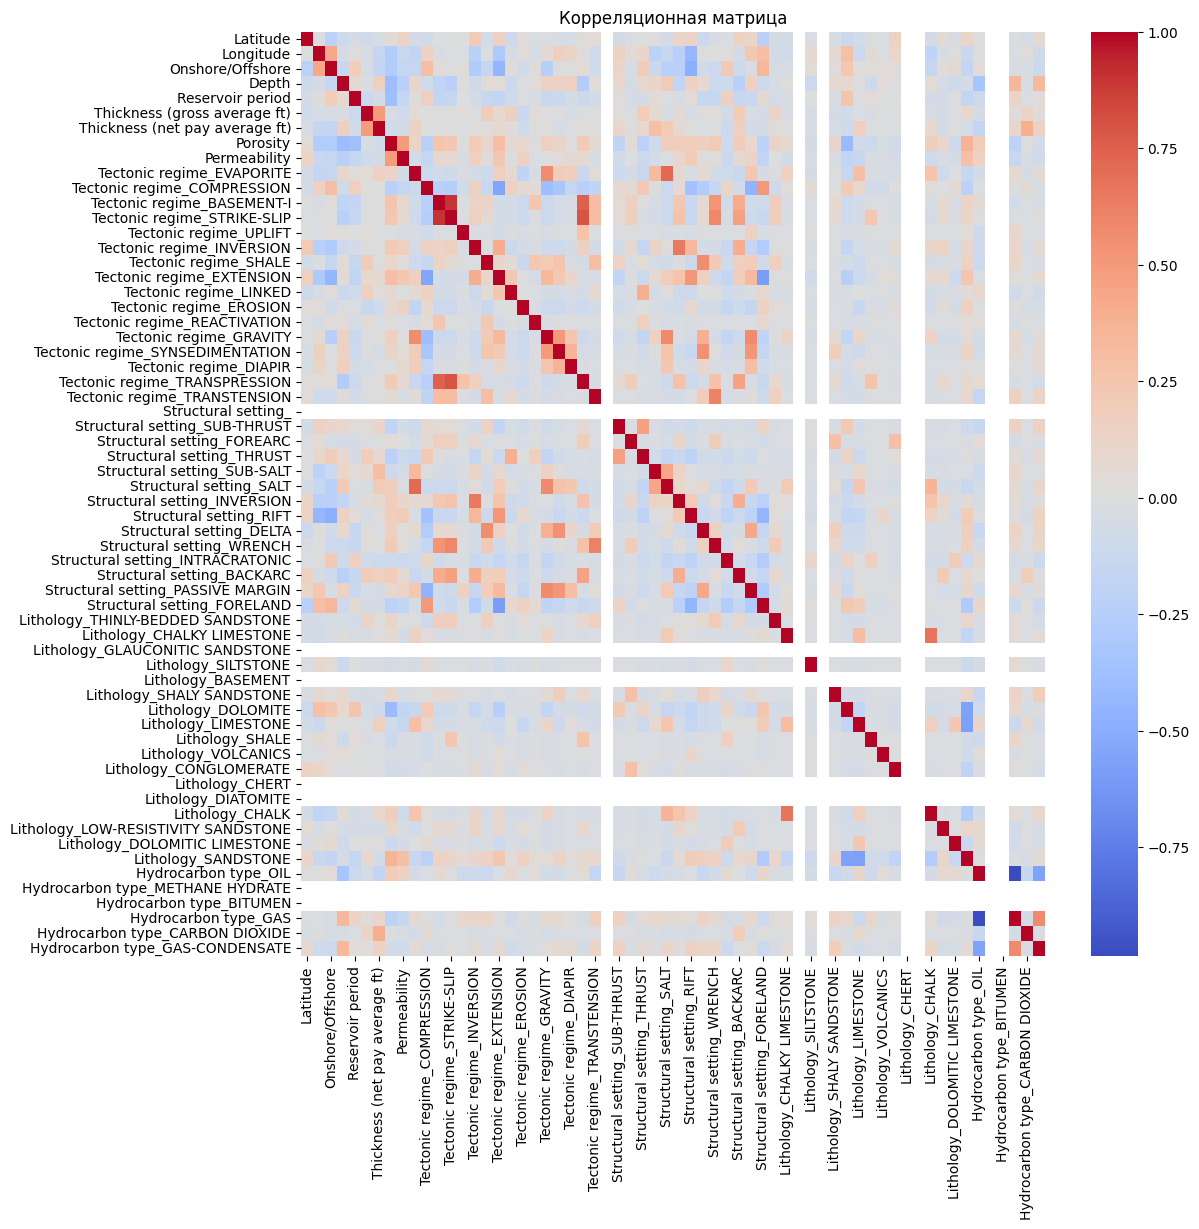

In [289]:
# Построение корреляционной матрицы
correlation_matrix = train.corr()

# Визуализация корреляционной матрицы с использованием heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

## Подготовка к обучению

### Разделение на выборки

In [290]:
X = train.drop(columns=["Onshore/Offshore"])
y = train["Onshore/Offshore"]

### Балансировка классов

In [360]:
os = ADASYN(random_state=0, n_neighbors=4)

column = X.columns

print("До балансировки данных")
print(X.shape)
print(y.value_counts())

os_data_X, os_data_y = os.fit_resample(X, y)
os_data_X = pd.DataFrame(data=os_data_X, columns=column)
os_data_y = pd.DataFrame(data=os_data_y, columns=["Onshore/Offshore"])

print("После балансировки")
print(os_data_X.shape)
print(os_data_y.value_counts())

# os_data_X, os_data_y = X, y

До балансировки данных
(309, 61)
Onshore/Offshore
2    218
0     86
1      5
Name: count, dtype: int64
После балансировки
(655, 61)
Onshore/Offshore
1                   220
2                   218
0                   217
Name: count, dtype: int64


In [361]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3)

print(f"Train dataset size: {X_train.shape}, {y_train.shape}")
print(f"Test dataset size: {X_test.shape}, {y_test.shape}")

Train dataset size: (458, 61), (458, 1)
Test dataset size: (197, 61), (197, 1)


## Модели

### DecisionTreeClassifier

In [319]:
# param_grid_DTC = {
#     "criterion": ["gini", "entropy"],
#     "max_depth": [None, 5, 10, 15, 20],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
#     "splitter": ["best", "random"],
# }

# model = DecisionTreeClassifier(random_state=0)
# grid_search = GridSearchCV(model, param_grid_DTC, cv=5)
# grid_search.fit(X_train, y_train)
# best_params_DTC = grid_search.best_params_

In [323]:
best_params_DTC = {
    "criterion": "gini",
    "max_depth": None,
    "min_samples_leaf": 1,
    "min_samples_split": 2,
    "splitter": "best",
}

In [324]:
model_DTC = DecisionTreeClassifier(random_state=0, **best_params_DTC)
model_DTC.fit(X_train, y_train)
answers_pred = model_DTC.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, answers_pred)}")

answers_pred = pd.DataFrame(answers_pred, columns=["Onshore/Offshore"])
answers_pred["Onshore/Offshore"] = answers_pred["Onshore/Offshore"].replace(
    {0: "OFFSHORE", 2: "ONSHORE", 1: "ONSHORE/OFFSHORE"}
)
answers_pred = answers_pred.reset_index()
answers_pred["Onshore/Offshore"].value_counts()

Accuracy: 0.9187817258883249


Onshore/Offshore
ONSHORE/OFFSHORE    71
OFFSHORE            70
ONSHORE             56
Name: count, dtype: int64

### RandomForestClassifier

In [ ]:
# param_grid_RFC = {
#     "n_estimators": [100, 200, 300],  # Количество деревьев в лесу
#     "criterion": ["gini", "entropy"],  # Критерий для измерения качества разделения
#     "max_depth": [None, 5, 15, 20],  # Максимальная глубина деревьев
#     "min_samples_split": [2, 5, 10],  # Минимальное количество образцов для разделения
#     "min_samples_leaf": [1, 2, 4],  # Минимальное количество образцов в листовом узле
#     "max_features": [
#         "auto",
#         "sqrt",
#         "log2",],  # Количество признаков для выбора лучшего разделения
#     "bootstrap": [True, False],  # Использование бутстрэпа для построения деревьев
# }

# model = RandomForestClassifier(random_state=0)
# grid_search = GridSearchCV(model, param_grid_RFC, cv=5)
# grid_search.fit(X_train, y_train)
# best_params_RFC = grid_search.best_params_

In [326]:
best_params_RFC = {
    "bootstrap": False,
    "criterion": "entropy",
    "max_depth": None,
    "max_features": "log2",
    "min_samples_leaf": 1,
    "min_samples_split": 5,
    "n_estimators": 300,
}

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [327]:
model_RFC = RandomForestClassifier(random_state=0, **best_params_RFC)
model_RFC.fit(X_train, y_train)
answers_pred = model_RFC.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, answers_pred)}")

answers_pred = pd.DataFrame(answers_pred, columns=["Onshore/Offshore"])
answers_pred["Onshore/Offshore"] = answers_pred["Onshore/Offshore"].replace(
    {0: "OFFSHORE", 2: "ONSHORE", 1: "ONSHORE/OFFSHORE"}
)
answers_pred = answers_pred.reset_index()
answers_pred["Onshore/Offshore"].value_counts()

c:\Users\Илья\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9543147208121827


Onshore/Offshore
ONSHORE/OFFSHORE    71
OFFSHORE            66
ONSHORE             60
Name: count, dtype: int64

### XGBClassifier

In [328]:
# param_grid_XGBC = {
#     "max_depth": [5, 6, 7],  # Максимальная глубина деревьев
#     "learning_rate": [0.2, 0.3, 0.4],  # Скорость обучения
#     "n_estimators": [50, 100, 200],  # Количество деревьев
#     "subsample": [
#         0.9,
#         1.0,
#     ],  # Доля подвыборки образцов при обучении каждого дерева
#     "colsample_bytree": [0.7, 0.8, 1.0],  # Доля признаков при обучении каждого дерева
#     "gamma": [
#         0,
#         0.1,
#     ],  # Минимальное снижение значения функции потерь для создания нового разделения
#     "reg_alpha": [0, 0.1],  # L1 регуляризация для весов дерева
#     "reg_lambda": [0.9, 1],  # L2 регуляризация для весов дерева
# }

# model = XGBClassifier(random_state=0)
# grid_search = GridSearchCV(model, param_grid_XGBC, cv=5)
# grid_search.fit(X_train, y_train)
# best_params_XGBC = grid_search.best_params_

In [342]:
best_params_XGBC = {
    "colsample_bytree": 0.8,
    "gamma": 0,
    "learning_rate": 0.3,
    "max_depth": 5,
    "n_estimators": 50,
    "reg_alpha": 0,
    "reg_lambda": 1,
    "subsample": 1.0,
}

In [343]:
model_XGBC = XGBClassifier(random_state=0, **best_params_XGBC)
model_XGBC.fit(X_train, y_train)
answers_pred = model_XGBC.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, answers_pred)}")

answers_pred = pd.DataFrame(answers_pred, columns=["Onshore/Offshore"])
answers_pred["Onshore/Offshore"] = answers_pred["Onshore/Offshore"].replace(
    {0: "OFFSHORE", 2: "ONSHORE", 1: "ONSHORE/OFFSHORE"}
)
answers_pred = answers_pred.reset_index()
answers_pred["Onshore/Offshore"].value_counts()

Accuracy: 0.949238578680203


Onshore/Offshore
ONSHORE/OFFSHORE    71
OFFSHORE            67
ONSHORE             59
Name: count, dtype: int64

### VotingClassifier

In [344]:
estimator = []
estimator.append(("XGB", XGBClassifier(random_state=0, **best_params_XGBC)))
estimator.append(("RF", RandomForestClassifier(random_state=0, **best_params_RFC)))
estimator.append(("DT", DecisionTreeClassifier(random_state=0, **best_params_DTC)))
model_VC = VotingClassifier(estimators=estimator, voting="soft")
model_VC.fit(X_train, y_train)
answers_pred = model_VC.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, answers_pred)}")

answers_pred = pd.DataFrame(answers_pred, columns=["Onshore/Offshore"])
answers_pred["Onshore/Offshore"] = answers_pred["Onshore/Offshore"].replace(
    {0: "OFFSHORE", 2: "ONSHORE", 1: "ONSHORE/OFFSHORE"}
)
answers_pred = answers_pred.reset_index()
answers_pred["Onshore/Offshore"].value_counts()

c:\Users\Илья\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Илья\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 0.949238578680203


Onshore/Offshore
ONSHORE/OFFSHORE    71
OFFSHORE            66
ONSHORE             60
Name: count, dtype: int64

## Финальный предикт

In [367]:
model = VotingClassifier(estimators=estimator, voting="soft")
# model = RandomForestClassifier(random_state=0, **best_params_RFC)
# model = XGBClassifier(random_state=0, **best_params_XGBC)
model.fit(os_data_X, os_data_y)
y_pred_test = model.predict(test)
y_pred_test = pd.DataFrame(y_pred_test, columns=["Onshore/Offshore"])
y_pred_test["Onshore/Offshore"] = y_pred_test["Onshore/Offshore"].replace(
    {0: "OFFSHORE", 2: "ONSHORE", 1: "ONSHORE/OFFSHORE"}
)
y_pred_test = y_pred_test.reset_index()

c:\Users\Илья\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Илья\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [368]:
y_pred_test['Onshore/Offshore'].value_counts()

Onshore/Offshore
ONSHORE     91
OFFSHORE    42
Name: count, dtype: int64

In [369]:
y_pred_test.to_csv("predict 7.csv", index=False)